# AdaBoost Algorithm
**AdaBoost (Adaptive Boosting)** is a popular ensemble learning algorithm, primarily used for classification tasks but also applicable to regression. The core idea behind AdaBoost is to combine the outputs of several weak learners (often decision trees with a single split, known as decision stumps) to form a strong learner with better accuracy.

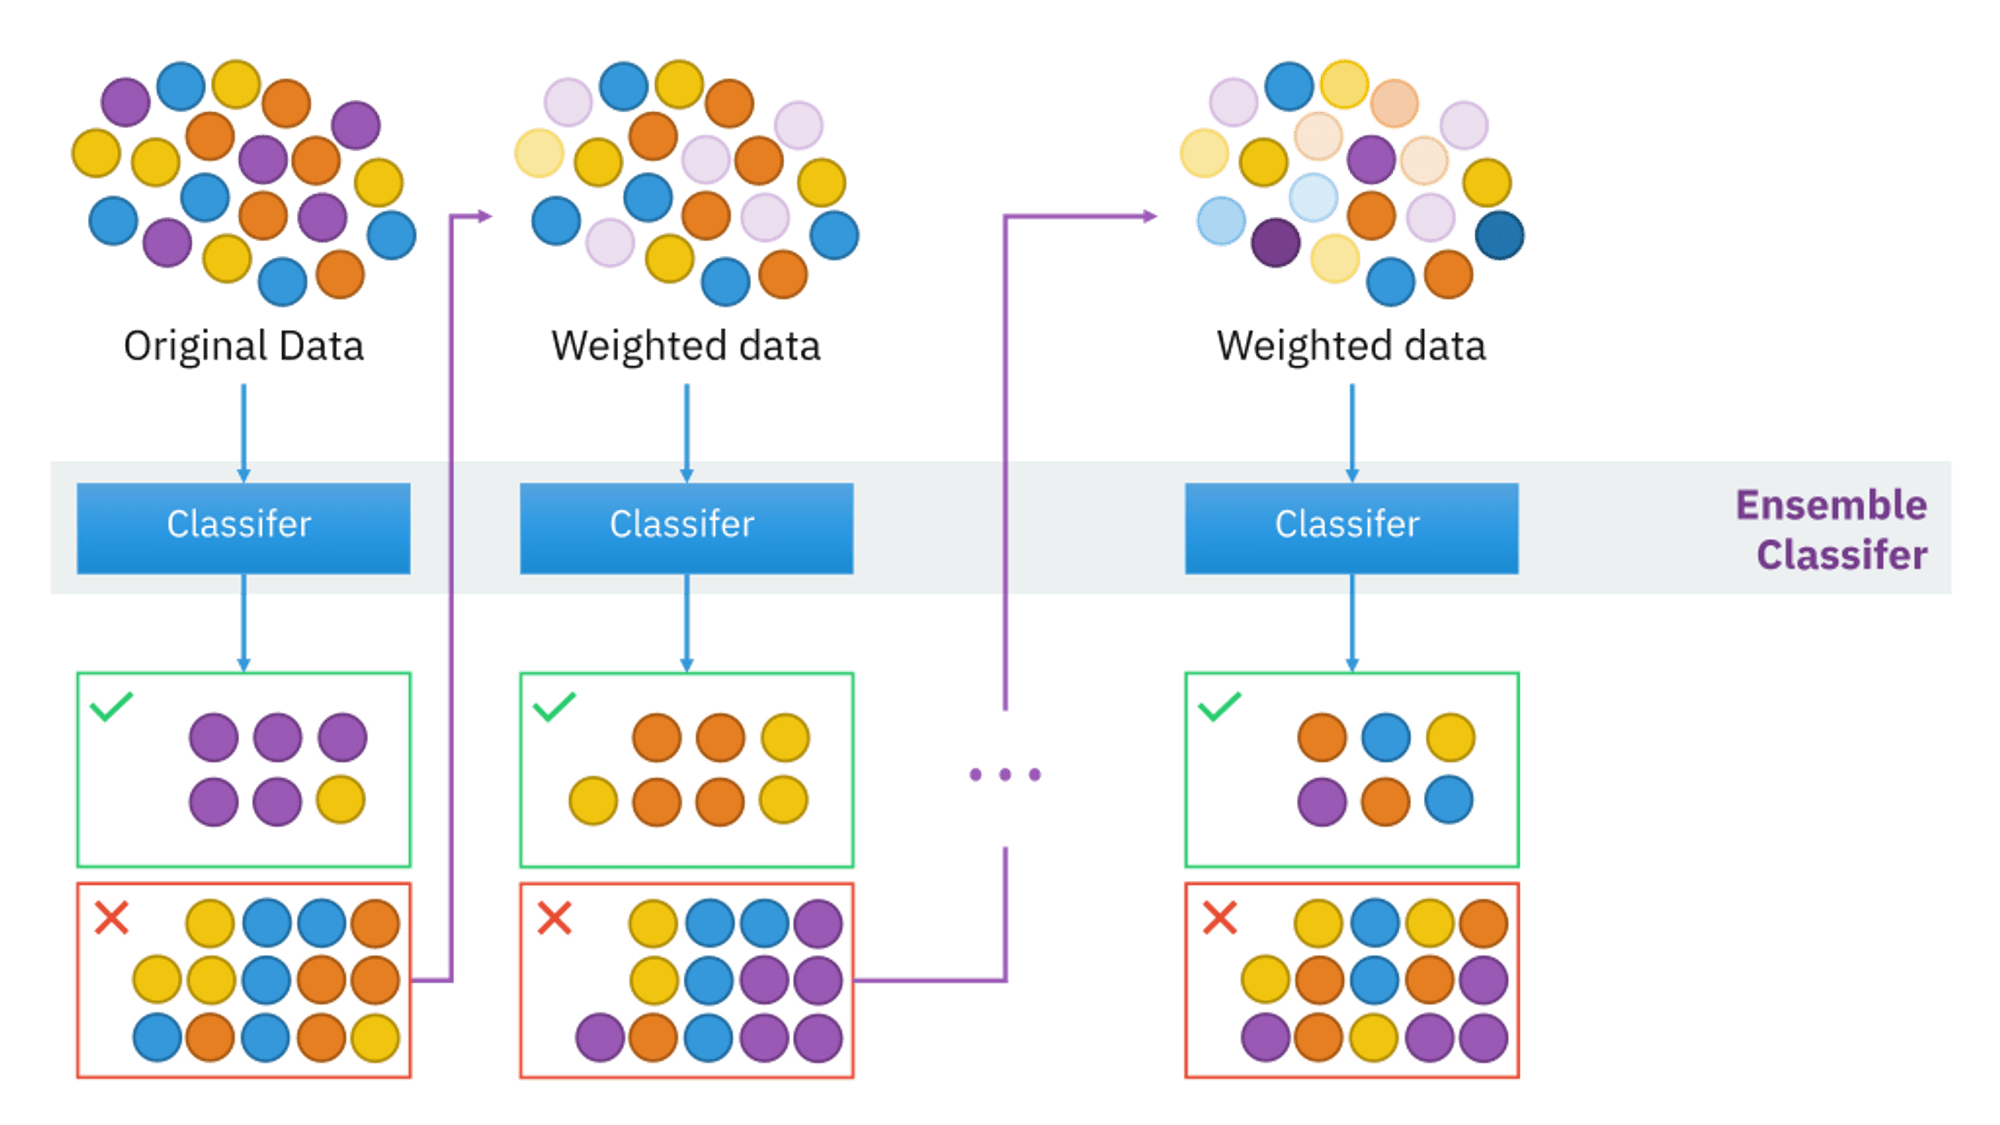


## How AdaBoost Works

1. **Initialization**: Start with an equal weight for all training samples. Suppose you have \( n \) samples. Each sample is initially given a weight of \( \frac{1}{n} \).

2. **Training Weak Learners**:
   - Train a weak learner (e.g., a decision stump) on the weighted dataset.
   - Evaluate the weak learner's performance. Specifically, measure its error rate, which is the sum of the weights of the misclassified samples.
   - Calculate the importance (weight) of this weak learner. The lower the error, the higher the weight, meaning it contributes more to the final prediction.
   - Update the weights of the training samples. Misclassified samples are given higher weights, meaning they will be more emphasized in the next round of training. Correctly classified samples have their weights reduced.
   - Normalize the weights to ensure they sum to 1.

3. **Iteration**: Repeat the process for a pre-defined number of iterations or until the error rate drops below a certain threshold. Each iteration focuses more on the samples that were misclassified in previous rounds.

4. **Final Model**: The final model is a weighted sum of the weak learners. During prediction, each weak learner's prediction is multiplied by its importance (weight), and the final decision is made based on the weighted majority vote (for classification) or a weighted average (for regression).

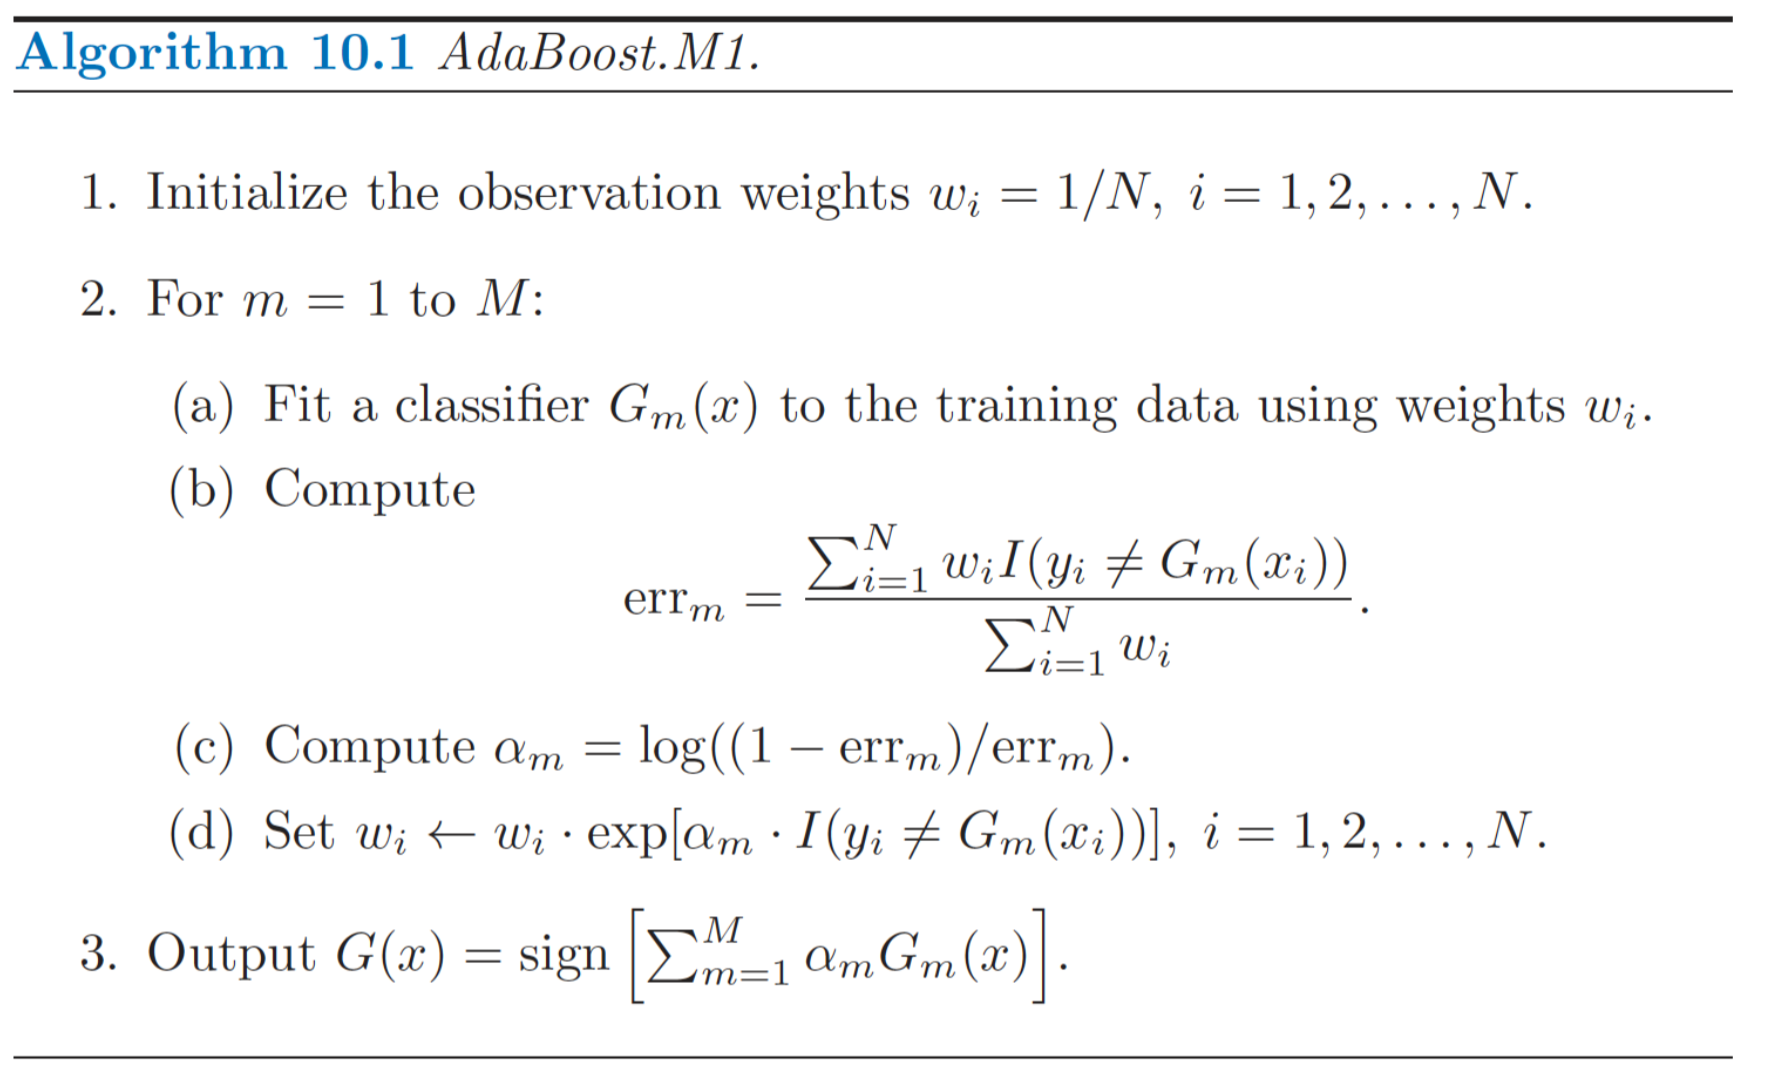

## Key Concepts in AdaBoost

- **Weak Learner**: A simple model that performs slightly better than random guessing. Decision stumps are commonly used.
- **Boosting**: The process of converting weak learners into a strong learner by sequentially focusing on the mistakes made by the previous learners.
- **Weights**: AdaBoost assigns weights to each training instance, emphasizing harder-to-classify instances over time.

## Parameters of AdaBoost

1. **`n_estimators`**:
   - **Description**: The number of weak learners (iterations) to train. More estimators can lead to a stronger model but also increase the risk of overfitting.
   - **Choosing Ideal Value**: Start with a moderate number (e.g., 50-100). Increase if underfitting, but monitor for overfitting by using cross-validation.

2. **`learning_rate`**:
   - **Description**: A hyperparameter that controls the contribution of each weak learner. It scales the weights of the weak learners. A smaller learning rate requires more estimators.
   - **Choosing Ideal Value**: Default is usually 1.0. Lower values (e.g., 0.01, 0.1) make the model more robust to overfitting but require more estimators. Experimentation and cross-validation help in finding the best value.

3. **`base_estimator`**:
   - **Description**: The type of weak learner used. By default, it is a decision stump, but you can replace it with any other classifier.
   - **Choosing Ideal Value**: For most applications, the default decision stump works well. However, for more complex datasets, a different base estimator (e.g., deeper trees, SVMs) might perform better.

4. **`algorithm`**:
   - **Description**: Defines the type of boosting algorithm used. Options are:
     - `'SAMME'`: For multi-class classification.
     - `'SAMME.R'`: A variant of SAMME that uses probabilities and is generally faster.
   - **Choosing Ideal Value**: `'SAMME.R'` is usually preferred due to better performance.

5. **`random_state`**:
   - **Description**: Controls the randomness of the estimator, ensuring reproducibility of results.
   - **Choosing Ideal Value**: Set to a fixed integer for reproducibility.

## Choosing Ideal Parameter Values

1. **Grid Search/Random Search**: Use these techniques to explore combinations of `n_estimators`, `learning_rate`, and other parameters. Cross-validation within these searches helps find the best combination.

2. **Learning Curves**: Plot learning curves to understand the model's performance with varying `n_estimators` and `learning_rate`.

3. **Cross-Validation**: Essential for testing different parameter combinations to avoid overfitting.

4. **Domain Knowledge**: Tailor parameters based on your specific dataset and problem context.

## Summary

AdaBoost is a powerful ensemble technique that can significantly improve the performance of weak learners by focusing on their mistakes and iteratively refining the model. Its strength lies in its adaptability, making it a robust choice for various classification tasks, provided the parameters are tuned carefully.

# Importing Basic Libraries

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Exploring and Preprocessing Training Data

Dataset Link - https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [6]:
df_train = pd.read_csv('TT_train.csv')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* **`PassengerId`**: A unique identifier for each passenger.
* **`Survived`**: Indicates whether the passenger survived (1) or not (0).
* **`Pclass`**: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class), which can be an indicator of socio-economic status.
* **`Name`**: The name of the passenger.
* **`Sex`**: The gender of the passenger (male or female).
* **`Age`**: The age of the passenger. There might be missing values.
* **`SibSp`**: The number of siblings or spouses aboard the Titanic with the passenger.
* **`Parch`**: The number of parents or children aboard the Titanic with the passenger.
* **`Ticket`**: The ticket number, which can be a mix of letters and numbers.
* **`Fare`**: The amount of money the passenger paid for the ticket.
* **`Cabin`**: The cabin number assigned to the passenger. This might have missing values as not all passengers had a cabin.
* **`Embarked`**: The port where the passenger boarded the Titanic. (C = Cherbourg, Q = Queenstown, S = Southampton).

In [9]:
df_train = df_train.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Numerical Columns in train data are: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


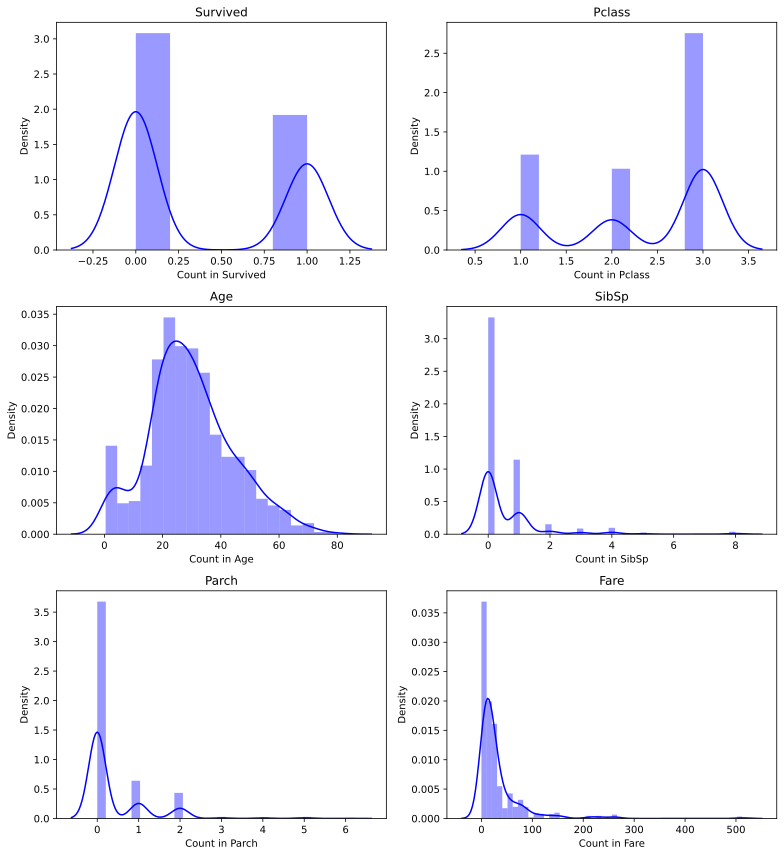

In [11]:
Numerical_Columns = [i for i in df_train.columns if df_train[i].dtype != 'object']
print("Numerical Columns in train data are:", Numerical_Columns)

num_cols = 2
num_rows = int(np.ceil(len(Numerical_Columns) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 4 * num_rows))
axes = axes.flatten()


for i, col in enumerate(Numerical_Columns):
    sns.distplot(df_train[col], color='Blue', ax=axes[i])
    axes[i].set_xlabel(f'Count in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  


for j in range(len(Numerical_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
df_train['Age'].fillna(int(df_train['Age'].mean()),inplace = True)

Categorical Columns in train data are: ['Sex', 'Embarked']


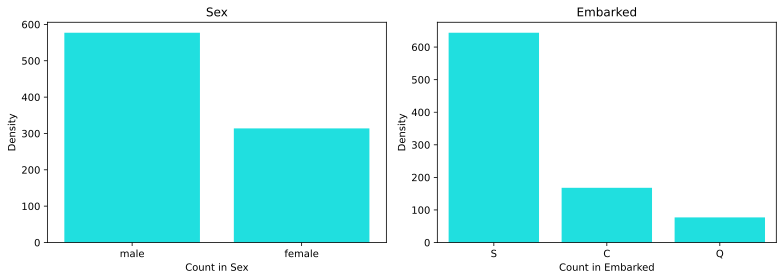

In [13]:
Categorical_Columns = [i for i in df_train.columns if df_train[i].dtype == 'object']
print("Categorical Columns in train data are:", Categorical_Columns)

num_cols = 2
num_rows = int(np.ceil(len(Categorical_Columns) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 4 * num_rows))
axes = axes.flatten()


for i, col in enumerate(Categorical_Columns):
    sns.countplot(x=df_train[col], color='cyan', ax=axes[i])
    axes[i].set_xlabel(f'Count in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  


for j in range(len(Categorical_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)

# Exploring and Preprocessing Testing Data
Dataset Link - https://www.kaggle.com/competitions/titanic/data?select=test.csv

In [16]:
df_test = pd.read_csv('TT_test.csv')

In [17]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
df_test = df_test.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


Numerical Columns in test data are: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


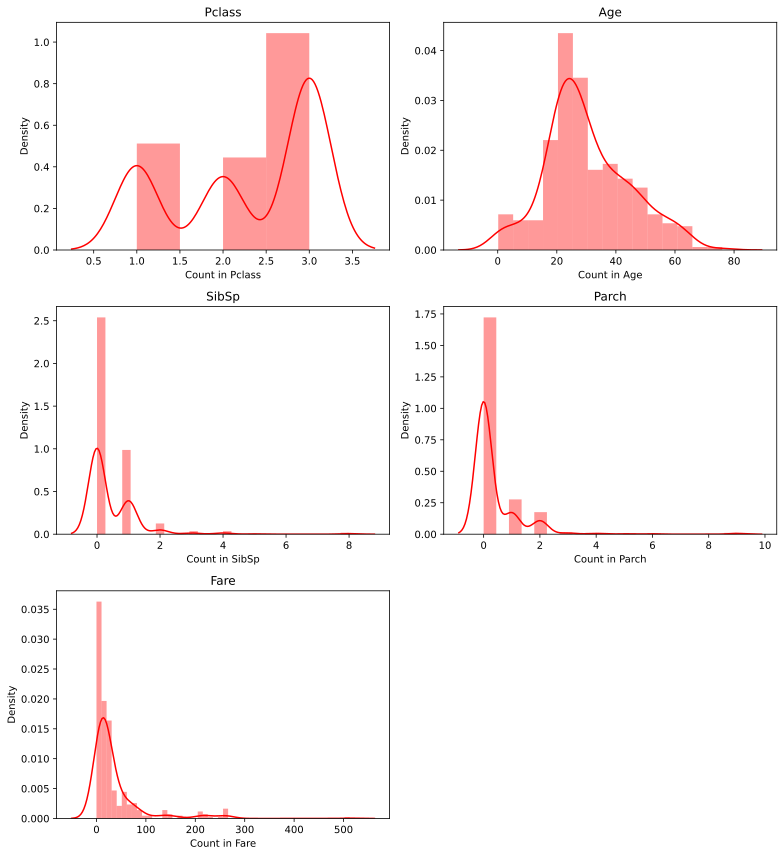

In [20]:
Numerical_Columns_Test = [i for i in df_test.columns if df_test[i].dtype != 'object']
print("Numerical Columns in test data are:", Numerical_Columns_Test)

num_cols = 2
num_rows = int(np.ceil(len(Numerical_Columns_Test) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 4 * num_rows))
axes = axes.flatten()


for i, col in enumerate(Numerical_Columns_Test):
    sns.distplot(df_test[col], color='Red', ax=axes[i])
    axes[i].set_xlabel(f'Count in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  


for j in range(len(Numerical_Columns_Test), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
df_test['Age'].fillna(int(df_test['Age'].mean()), inplace = True)
df_test['Fare'].fillna(int(df_test['Fare'].mean()), inplace = True)

Categorical Columns in test data are: ['Sex', 'Embarked']


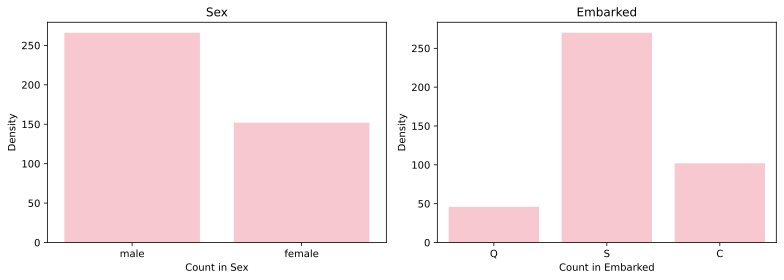

In [22]:
Categorical_Columns_Test = [i for i in df_test.columns if df_test[i].dtype == 'object']
print("Categorical Columns in test data are:", Categorical_Columns_Test)

num_cols = 2
num_rows = int(np.ceil(len(Categorical_Columns_Test) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 4 * num_rows))
axes = axes.flatten()


for i, col in enumerate(Categorical_Columns_Test):
    sns.countplot(x=df_test[col], color='pink', ax=axes[i])
    axes[i].set_xlabel(f'Count in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  


for j in range(len(Categorical_Columns_Test), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Encoding Both Training and Testing Data

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for col in ['Sex','Embarked']:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    label_encoders[col] = le


    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f'Mapped for {col}: {mapping}')

Mapped for Sex: {'female': 0, 'male': 1}
Mapped for Embarked: {'C': 0, 'Q': 1, 'S': 2}


# Data Preprocessing and Model Buidling

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100,
        learning_rate=0.1,
        algorithm='SAMME.R',
        random_state=42
    ))
])

#### Deifining X and y varaible as independent and dependent variable.

In [28]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Pipiline Overview

In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    learning_rate=0.1, n_estimators=100,
                                    random_state=42))])

#### Feature Importances in Random Forest

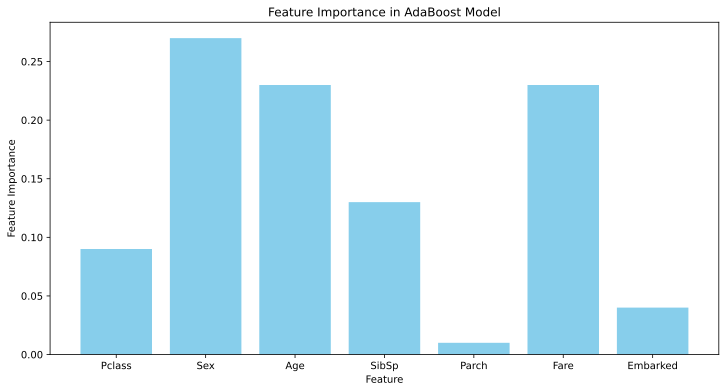

In [33]:
feature_importances = pipeline.named_steps['classifier'].feature_importances_
plt.figure(figsize=(12,6))
plt.bar(X.columns, feature_importances,color='Skyblue')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in AdaBoost Model')
plt.show()

# Model Prediction and Evaluation

In [35]:
y_val_pred = pipeline.predict(X_val)
test_pred = pipeline.predict(df_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}\n')
print('Classification Report')
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.80

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [37]:
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy: 0.79


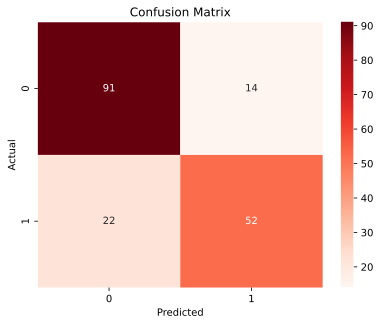

In [38]:
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Summary

| **Metric**              | **Class 0 (Not Survived)**         | **Class 1 (Survived)**            | **Overall**       | **Interpretation**                                                                                                                                      |
|-------------------------|------------------------------------|-----------------------------------|-------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Precision**           | 0.81                               | 0.79                              | -                 | 81% of predicted non-survivors are correct; 79% of predicted survivors are correct.                                                                       |
| **Recall**              | 0.87                               | 0.70                              | -                 | 87% of actual non-survivors are correctly identified; 70% of actual survivors are correctly identified.                                                   |
| **F1-Score**            | 0.83                               | 0.74                              | -                 | Balance between precision and recall is higher for non-survivors (0.83) compared to survivors (0.74).                                                     |
| **Support**             | 105                                | 74                                | 179 (total)       | There are 105 actual non-survivors and 74 actual survivors in the validation set.                                                                         |
| **Validation Accuracy** | -                                  | -                                 | 0.80              | The model correctly predicts the survival status for 80% of the validation set samples.                                                                   |
| **Cross-Validation Accuracy** | -                           | -                                 | 0.79              | The model's average accuracy across multiple folds is 79%, indicating consistent performance across different subsets of data.                            |
| **Confusion Matrix**    | 91 True Negatives, 14 False Positives | 22 False Negatives, 52 True Positives | -               | 91 non-survivors correctly predicted, 14 misclassified as survivors; 52 survivors correctly predicted, 22 misclassified as non-survivors.                 |

- **Precision**: The model is slightly better at correctly identifying non-survivors than survivors, with a precision of 81% for non-survivors and 79% for survivors.
- **Recall**: The model is more effective at identifying non-survivors (87%) than survivors (70%).
- **F1-Score**: The F1-score indicates that the model is more balanced in predicting non-survivors (0.83) compared to survivors (0.74).
- **Validation Accuracy**: The model accurately predicts the survival status 80% of the time on the validation set.
- **Cross-Validation Accuracy**: The model’s average accuracy across different data folds is 79%, showing it generalizes well to unseen data.
- **Confusion Matrix**: The model has a good balance of correctly identifying both survivors and non-survivors, with a slightly higher error in predicting survivors.

# Refrence
1. https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.almabetter.com%2Fbytes%2Ftutorials%2Fdata-science%2Fadaboost-algorithm&psig=AOvVaw0g09topRWxUivbEkGs75yh&ust=1724770401486000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCJj-88v0kogDFQAAAAAdAAAAABBP
2. https://www.google.com/url?sa=i&url=https%3A%2F%2Fmath.stackexchange.com%2Fquestions%2F3778238%2Funderstanding-adaboost-algorithm&psig=AOvVaw0g09topRWxUivbEkGs75yh&ust=1724770401486000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCJj-88v0kogDFQAAAAAdAAAAABBW